**Dataset:**

- **`CUST_ID`** : Identificación del titular de la tarjeta de crédito
- **`BALANCE`** : Cantidad de saldo restante en su cuenta para hacer compras
- **`BALANCE_FREQUENCY`** : Con qué frecuencia se actualiza el saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
- **`PURCHASES`** : Monto de las compras realizadas desde la cuenta
- **`ONEOFF_PURCHASES`** : Monto máximo de compra realizada de una sola vez
- **`INSTALLMENTS_PURCHASES`** : Monto de la compra realizada a plazos
- **`CASH_ADVANCE`** : Dinero en efectivo anticipado entregado por el usuario
- **`PURCHASES_FREQUENCY`** : Con qué frecuencia se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
- **`ONEOFFPURCHASESFREQUENCY`** : Con qué frecuencia se realizan las compras de una sola vez (1 = compras frecuentes, 0 = compras no frecuentes)
- **`PURCHASESINSTALLMENTSFREQUENCY`** : Con qué frecuencia se realizan las compras a plazos (1 = compras frecuentes, 0 = compras no frecuentes)
- **`CASHADVANCEFREQUENCY`** : Con qué frecuencia se está pagando el dinero en efectivo anticipado
- **`CASHADVANCETRX`** : Número de transacciones realizadas con "Efectivo en avance"
- **`PURCHASES_TRX`** : Número de transacciones de compra realizadas
- **`CREDIT_LIMIT`** : Límite de la tarjeta de crédito para el usuario
- **`PAYMENTS`** : Cantidad de pagos realizados por el usuario
- **`MINIMUM_PAYMENTS`** : Cantidad mínima de pagos realizados por el usuario
- **`PRCFULLPAYMENT`** : Porcentaje del pago completo realizado por el usuario
- **`TENURE`** : Tenencia del servicio de tarjeta de crédito para el usuario

# **Cargamos el dataset**

In [115]:
import pandas as pd
df = pd.read_csv('./Datos/CC GENERAL.csv')

In [116]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [117]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


# **Manipulacion de los datos**

**Comprobamos si hay datos nulos**

In [118]:
df.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

**Rellenamos los datos nulos con la media del resto**

In [119]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [120]:
df.isnull().sum().sort_values(ascending=False).head()

CUST_ID             0
BALANCE             0
PRC_FULL_PAYMENT    0
MINIMUM_PAYMENTS    0
PAYMENTS            0
dtype: int64

**Eliminamos la columna `CUST_ID`**

In [121]:
X = df.drop('CUST_ID', axis=1)

**Normalizacion de datos**

In [122]:
from sklearn.preprocessing import StandardScaler

#Escalamos los datos
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

# **Visualizacion de datos**

**Matriz de correlación**

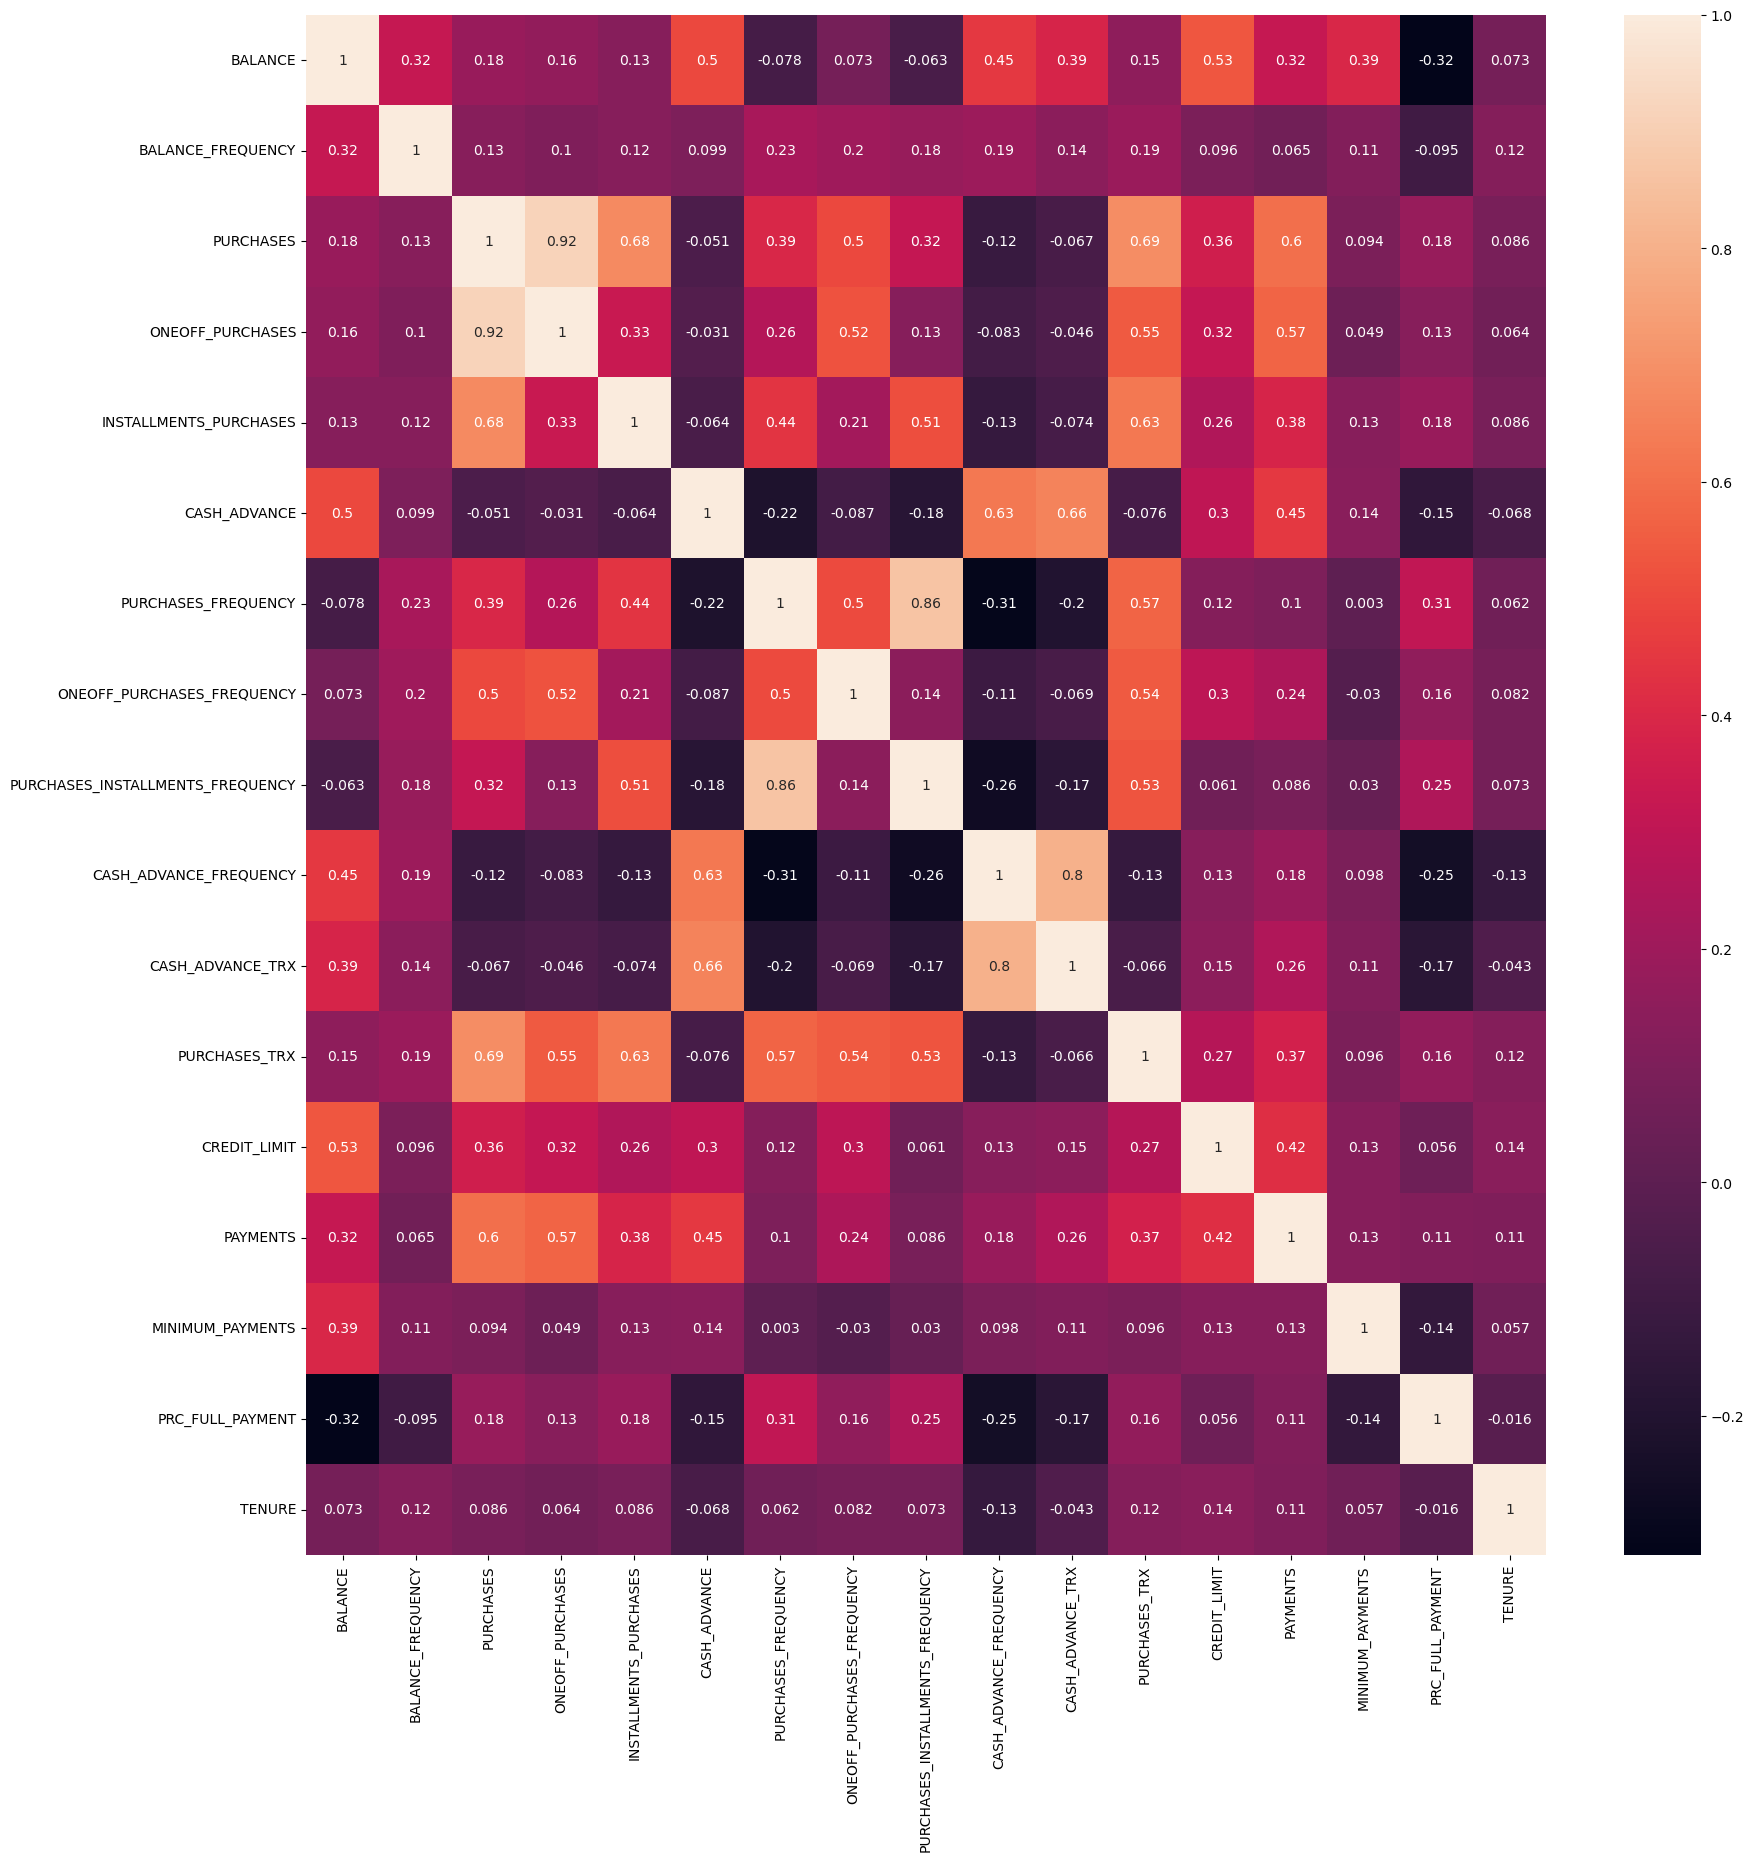

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

**Dendograma**

c:\Users\madre\anaconda3\lib\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(
C:\Users\madre\AppData\Local\Temp\ipykernel_10632\2585081238.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(D, method='complete')


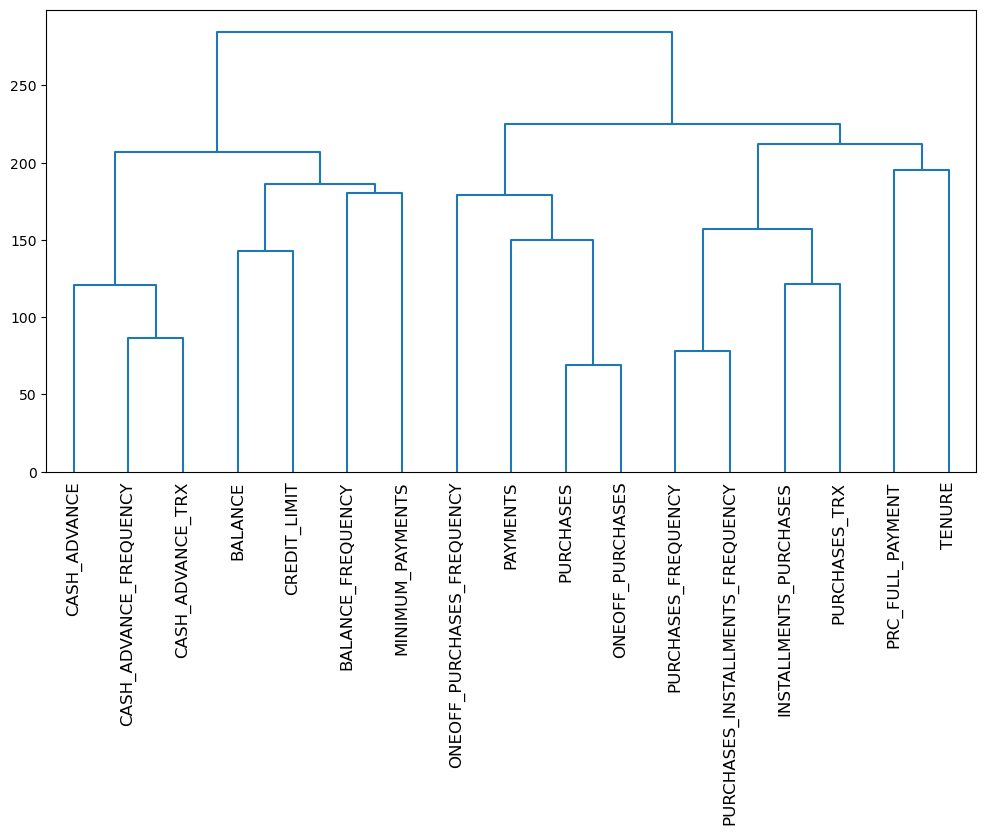

In [124]:
import sklearn.neighbors
import numpy as np
from scipy import cluster
import matplotlib.pyplot as plt

dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
D = dist.pairwise(X.T)
avD = np.average(D)

plt.figure(figsize=(12, 6))
clusters = cluster.hierarchy.linkage(D, method='complete')
cluster.hierarchy.dendrogram(
    clusters, color_threshold=7, labels=X.columns.to_list(), leaf_rotation=90)
plt.show()

# **Entrenamiento**

## **K-means**

**Obteneindo el Numeor de Clusters**

In [125]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 30):
    model = KMeans(n_clusters = k, random_state=42)
    model.fit(X)
    pred = model.predict(X)
    score = silhouette_score(X, pred)
    scores.append(score)

    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

Silhouette Score for k = 2: 0.210
Silhouette Score for k = 3: 0.251
Silhouette Score for k = 4: 0.198
Silhouette Score for k = 5: 0.193
Silhouette Score for k = 6: 0.203
Silhouette Score for k = 7: 0.214
Silhouette Score for k = 8: 0.219
Silhouette Score for k = 9: 0.226
Silhouette Score for k = 10: 0.212
Silhouette Score for k = 11: 0.219
Silhouette Score for k = 12: 0.216
Silhouette Score for k = 13: 0.221
Silhouette Score for k = 14: 0.195
Silhouette Score for k = 15: 0.204
Silhouette Score for k = 16: 0.199
Silhouette Score for k = 17: 0.206
Silhouette Score for k = 18: 0.207
Silhouette Score for k = 19: 0.207
Silhouette Score for k = 20: 0.177
Silhouette Score for k = 21: 0.211
Silhouette Score for k = 22: 0.203
Silhouette Score for k = 23: 0.181
Silhouette Score for k = 24: 0.209
Silhouette Score for k = 25: 0.183
Silhouette Score for k = 26: 0.180
Silhouette Score for k = 27: 0.177
Silhouette Score for k = 28: 0.187
Silhouette Score for k = 29: 0.175


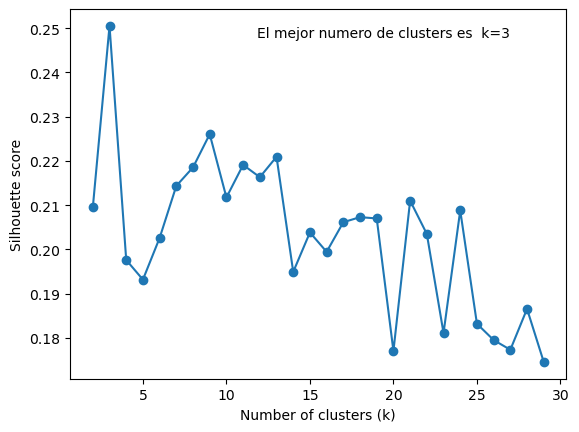

In [126]:
# Encontrar el índice del valor máximo
max_idx = scores.index(max(scores))
# Obtener el valor máximo
max_score = scores[max_idx]

# Trazar el gráfico
plt.plot(range(2, 30), scores, marker="o")
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')

# Agregar una etiqueta de texto en la esquina superior derecha del gráfico
plt.text(27, max_score, f'El mejor numero de clusters es  k={max_idx+2}', ha='right', va='top')

plt.show()

In [127]:
K = max_idx+2

**Añadiendo PCA**

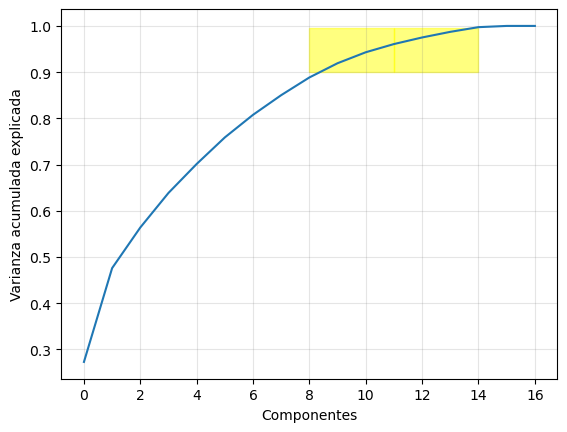

In [128]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca=PCA().fit(X)
# Crear el gráfico
fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel("Componentes")
ax.set_ylabel("Varianza acumulada explicada")

# Añadir un fondo de color solo donde las líneas se intersectan
ax.axvspan(8, 11, ymin=0.83, ymax=0.95, alpha=0.5, color='yellow')
ax.axvspan(11, 14, ymin=0.83, ymax=0.95, alpha=0.5, color='yellow')

# Añadir una cuadrícula de fondo
ax.grid(True, color='gray', alpha=0.2)

# Mostrar el gráfico
plt.show()

Obtnedremos el numeor de componentesen la parte coloreada de amarillo en este caso podemos elejir 12

In [129]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 12)
pca_X = pca.fit_transform(X)

In [130]:
model = KMeans(n_clusters = K, random_state=42)
model.fit(pca_X)
grupos = model.labels_
df['Grupos'] = grupos

In [131]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Grupos
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,2
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,2
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


### **Visualizacion**

c:\Users\madre\anaconda3\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


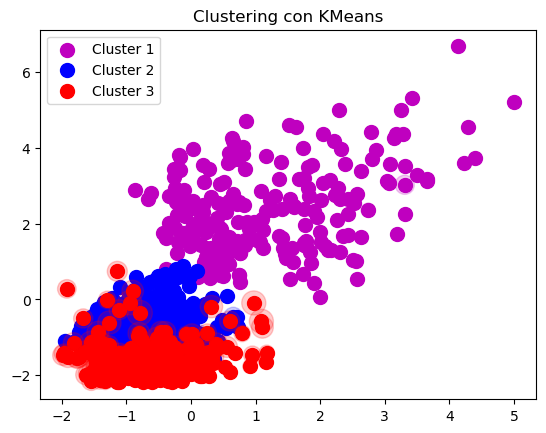

In [132]:
cores = ['m', 'b', 'r']
for i in range(len(cores)):
    plt.scatter(pca_X[pred == i, 0], pca_X[pred == i, 1], s = 100, c = cores[i], label = 'Cluster ' + str(i + 1))
    plt.scatter(pca_X[pred == i, 0], pca_X[pred == i, 1], s = pca_X[pred == i, 2]*100, c = cores[i], alpha=0.2)

plt.title('Clustering con KMeans')
plt.legend()
plt.show()
